<a href="https://colab.research.google.com/github/m-evdokimov/dls-detector/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
print('i am here')

i am here


### Importing datasets to colab

Dataset: [WIDER face](http://shuoyang1213.me/WIDERFACE/)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#images
!unzip -q /content/drive/MyDrive/WIDER_train.zip -d train
!unzip -q /content/drive/MyDrive/WIDER_val.zip -d val
!unzip -q /content/drive/MyDrive/WIDER_test.zip -d test

In [ ]:
#bounding boxes
!wget -P /content/ http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
!unzip -q /content/wider_face_split.zip -d face_split

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

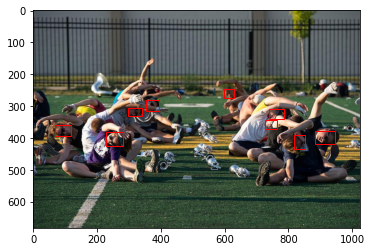

In [45]:
example_path = '/content/train/WIDER_train/images/0--Parade/0_Parade_marchingband_1_117.jpg'
bb_file_path = '/content/face_split/wider_face_split/wider_face_train_bbx_gt.txt'

with open(bb_file_path) as bb:
  counter = 0
  for line in bb:
    counter += 1
    line = line.strip()
    if line == '0--Parade/0_Parade_marchingband_1_117.jpg':
      line_index = counter
      break
  
  face_num = bb.readline().strip()
  faces = []
  for _ in range(int(face_num)):
    face = bb.readline().strip().split()
    faces.append(face)

fig = plt.figure()
ax = plt.axes()

for bbox in faces:
  l, t, w, h, *scores = map(float, bbox)
  x, y, w, h = l, t, w, h
  rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='none')
  ax.add_patch(rect)


img = mpimg.imread(example_path)
ax.imshow(img)
plt.show()
